# Libraries

In [1]:
import pandas as pd

# Preparing data

### Merging files 
#### Getting the links and merging the data directly from github public repository

In [264]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
all_months_data = pd.DataFrame()

for month in months:
    df = pd.read_csv(f"https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{month}_2019.csv")
    all_months_data = pd.concat([all_months_data, df])

#### If you want to save the data in a csv file

In [138]:
#all_months_data.to_csv("sales_data.csv", index = False)

In [265]:
sales_data = all_months_data
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# Data Analysis

## Cleaning data

In [266]:
# Cheking NaN
nan_df = sales_data[sales_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
# Deleting NaN
sales_data = sales_data.dropna(how="all")

In [268]:
#More clining since we got an error
temp_df = sales_data[sales_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [269]:
#We delete those duplicated rows
sales_data = sales_data[sales_data['Order Date'] != "Order Date"]

In [270]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [272]:
#Convert columns to the correct type

sales_data["Quantity Ordered"] = sales_data["Quantity Ordered"].astype("int32")
sales_data["Price Each"] = pd.to_numeric(sales_data["Price Each"])
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])

### 1. What was the best month for sales? How much was earned that month?

In [273]:
# Add a sales column

sales_data["Sales"] = sales_data["Quantity Ordered"] * sales_data["Price Each"]
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [274]:
#There was data from January 2020, we delet it

sales_data = sales_data[sales_data["Order Date"].dt.year == 2019]

In [170]:
results = sales_data.groupby(pd.Grouper(key="Order Date",freq="M")).sum()
results

,Quantity Ordered,Price Each,Sales
Order Date,,,
2019-01-31,10862,1.803265e+06,1.813586e+06
2019-02-28,13449,2.188885e+06,2.202022e+06
2019-03-31,17005,2.791208e+06,2.807100e+06
2019-04-30,20558,3.367671e+06,3.390670e+06
2019-05-31,18667,3.135125e+06,3.152607e+06
2019-06-30,15253,2.562026e+06,2.577802e+06
2019-07-31,16072,2.632540e+06,2.647776e+06
2019-08-31,13448,2.230345e+06,2.244468e+06
2019-09-30,13109,2.084992e+06,2.097560e+06


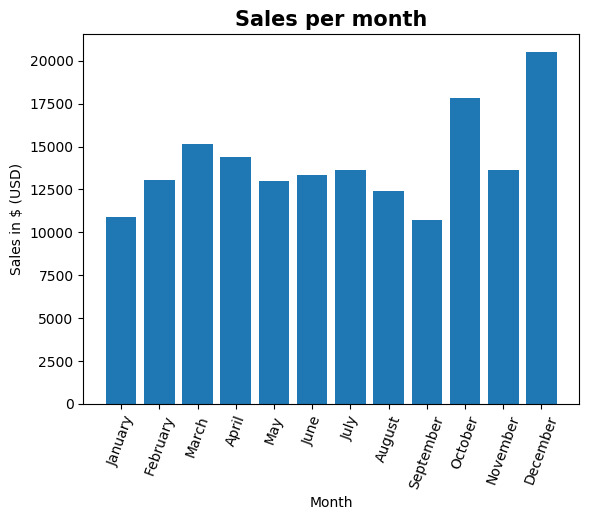

In [275]:
import matplotlib.pyplot as plt

# plt.rcdefaults()

months = results.index
months = months.month_name()
                         
plt.bar(months, results["Sales"])
plt.title("Sales per month", fontsize = 15, weight = "bold")
plt.ylabel("Sales in $ (USD)")
plt.xlabel("Month")
plt.xticks(rotation = 70)
plt.show()

In [152]:
# Had a bug, so checked how many orders have in the month of October. Leaving it just to remember how to access to a month row
results[months == "October"]

,Quantity Ordered,Price Each,Sales
Order Date,,,
2019-10-31,22,3347.33,3353.31


### 2. What US city had the highest number of sales?

In [180]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [276]:
# Creating city column

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

sales_data["City"] = sales_data["Purchase Address"].apply(lambda x : get_city(x) + " " + get_state(x))

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Austin TX


In [277]:
results_city = sales_data.groupby("City").sum().sort_values(by = "Sales")
results_city_index = results_city.index

In [240]:
#cities = sales_data["City"].unique() # this is ok, but we need this array to be in the same order than ersults_city["Sales"]
#cities = [city for city, df in results_city.groupby("City")] # this would give us the same order than in the original df

In [239]:
cities = [city for city in results_city_index ]
cities

[' Portland ME',
 ' Austin TX',
 ' Portland OR',
 ' Seattle WA',
 ' Dallas TX',
 ' Atlanta GA',
 ' Boston MA',
 ' New York City NY',
 ' Los Angeles CA',
 ' San Francisco CA']

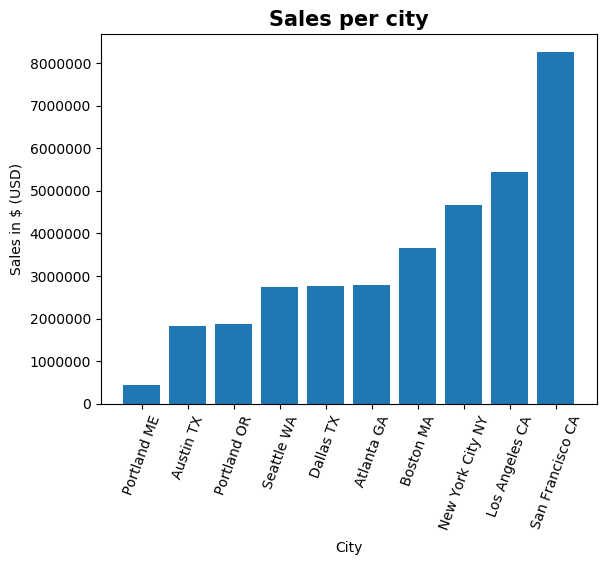

In [238]:
plt.bar(cities, results_city["Sales"])
plt.title("Sales per city", fontsize = 15, weight = "bold")
plt.ylabel("Sales in $ (USD)")
plt.xlabel("City")
plt.xticks(rotation = 70)
plt.show()

### What time should we display adds to maximize the likehood of customer's buying products?

In [260]:
# We could do this
results_hour = sales_data.groupby(pd.Grouper(key="Order Date",freq="H")).count() # we count the items bought
results_hour.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,City
Order Date,,,,,,,
2019-01-01 03:00:00,2,2,2,2,2,2,2
2019-01-01 04:00:00,1,1,1,1,1,1,1
2019-01-01 05:00:00,1,1,1,1,1,1,1
2019-01-01 06:00:00,4,4,4,4,4,4,4
2019-01-01 07:00:00,12,12,12,12,12,12,12


In [293]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,Boston MA,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Portland OR,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,Los Angeles CA,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Austin TX,11


In [294]:
# Or we could add a column that specifies the hour. Going with this option cause it's easier to plot later.
sales_data["Hour"] = sales_data["Order Date"].dt.hour

In [295]:
sales_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,Boston MA,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Portland OR,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,San Francisco CA,13


In [297]:
sales_data.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Hour,,,,,,,,
0,3898,3898,3898,3898,3898,3898,3898,3898
1,2341,2341,2341,2341,2341,2341,2341,2341
2,1239,1239,1239,1239,1239,1239,1239,1239
3,828,828,828,828,828,828,828,828
4,850,850,850,850,850,850,850,850
5,1319,1319,1319,1319,1319,1319,1319,1319
6,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256


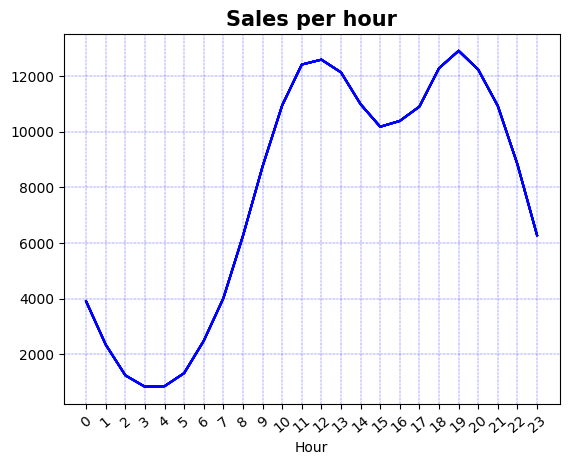

In [325]:
hours = [hour for hour, df in sales_data.groupby(["Hour"])]

plt.plot(hours, sales_data.groupby(["Hour"]).count(), color = "blue")
plt.title("Sales per hour", fontsize = 15, weight = "bold")
plt.xlabel("Hour")
plt.xticks(hours, rotation = 40)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

### What products are usually sold together? 